# MATH 210 Introduction to Mathematical Computing

## February 8, 2017

1. Matplotlib figure objects and axes objects
2. Plotting in 3D with mplot3d
3. Exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Matplotlib figure objects and axes objects

When we make a simple plot, there are a few things happening in the background with matplotlib. For example, let's plot $y = x^2$ for $x \in [-2,2]$.

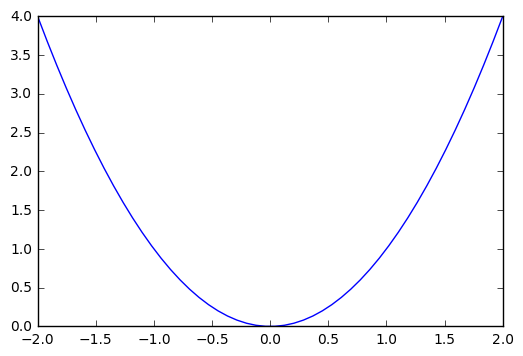

In [2]:
x = np.linspace(-2,2,50)
y = x**2
plt.plot(x,y);

When we call the `plot` command, matplotlib creates a new [figure object](http://matplotlib.org/api/figure_api.html) (think of it as a window containing plots) and a new [axes object](http://matplotlib.org/api/axes_api.html) (think of it as the box in which we plot stuff), and then it plots our data to the given axes conatined in the given figure.

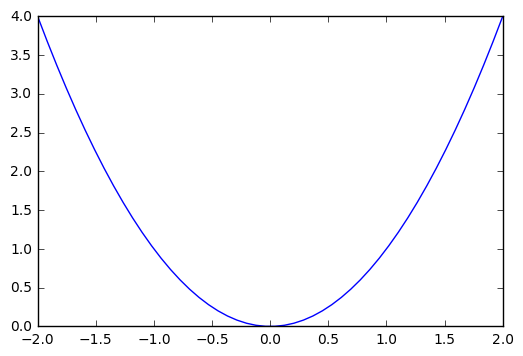

In [3]:
fig1 = plt.figure() # Create a new figure
ax1 = plt.axes() # Create a new axes object in the current figure
ax1.plot(x,y); # Plot a line in the current axes object

**We don't have to create figures and axes objects when we do 2D plotting**. The matplotlib pyplot commands `plot`, `scatter`, `bar`, etc. take care of all that for us. But let's keep figures and axes in mind when we do 3D plotting which requires us to explicitly create figure and 3D axes objects...

## 2. Plotting in 3D with mplot3D

[mplot3D](http://matplotlib.org/mpl_toolkits/mplot3d/) is matplotlib's 3D plotting library. To create a 3D plot, we first have to import the Axes3D class from mplot3d:

In [4]:
from mpl_toolkits.mplot3d import Axes3D

There are several kinds of 3D plots but let's start with simple surface plots:

* [Surface plots](http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#surface-plots)
* [Wireframe plots](http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#wireframe-plots)

Let's dive into some examples to see how to plot in 3D!

### Example

Let's plot the surface $z = 1 - x^2 - y^2$ for $x,y \in [-1,1]$.

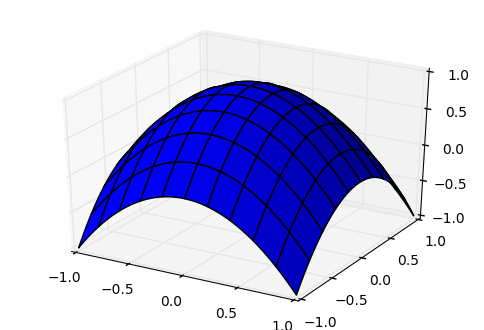

In [5]:
plt.figure() # Create a new figure
ax = plt.axes(projection='3d') # Create a new Axes3D object in the current figure

x = np.linspace(-1,1,100) # Create 1D array of x values
y = np.linspace(-1,1,100) # Create 1D array of y values
X, Y = np.meshgrid(x,y) # Create 2D arrays of x and y values
Z = 1 - X**2 - Y**2 # Create 2D array of z values
ax.plot_surface(X,Y,Z); # Plot the surface in the current Axes3D object

Before we explain [meshgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html), let's just do another example by modifying the code above.

### Example

Let's plot $z = \cos( \sqrt{x^2 + y^2} )$ for $x,y \in [-4\pi,4\pi]$:

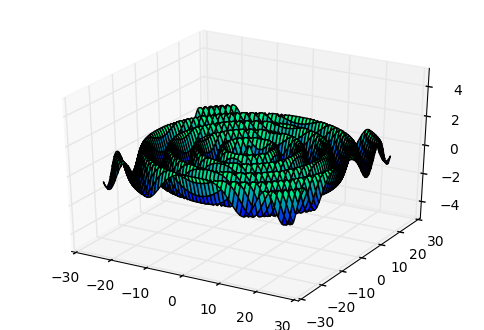

In [6]:
plt.figure() # Create a new figure
ax = plt.axes(projection='3d') # Create a new Axes3D object in the current figure

x = np.linspace(-8*np.pi,8*np.pi,500)
y = np.linspace(-8*np.pi,8*np.pi,500)
X, Y = np.meshgrid(x,y)
Z = np.cos( np.sqrt(X**2 + Y**2) )
ax.plot_surface(X,Y,Z,cmap=plt.cm.winter), ax.set_zlim(bottom=-5,top=5);

### What is meshgrid?!!

Like many 3D plotting libraries (ie. MATLAB), the 3D plotting functions require 2D matrices of x, y, and z values. Meshgrid takes x and y arrays and returns two 2D matrices X and Y with X has the x values across its rows and Y has the y values down its columns.

In [7]:
x = [1,2,3]
y = [8,9,10,11]

In [8]:
np.meshgrid(x,y)

[array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]), array([[ 8,  8,  8],
        [ 9,  9,  9],
        [10, 10, 10],
        [11, 11, 11]])]

The output of meshgrid is a list with 2 entries. We can unpack those entries into variables X and Y.

In [9]:
X, Y = np.meshgrid(x,y)

In [10]:
X

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [11]:
Y

array([[ 8,  8,  8],
       [ 9,  9,  9],
       [10, 10, 10],
       [11, 11, 11]])

Now we can use array operations to create the 2D array of $z$ values.

In [12]:
Z = 1 - X**2 - Y**2

In [13]:
Z

array([[ -64,  -67,  -72],
       [ -81,  -84,  -89],
       [-100, -103, -108],
       [-121, -124, -129]])

### Example

Let's plot a sphere! A 3D parametric plot with 2 parameters $\theta$ and $\phi$ (in spherical coordinates).

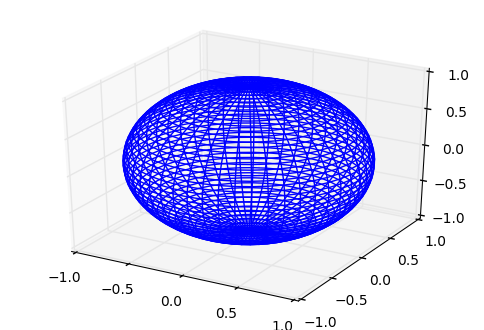

In [14]:
plt.figure() # Create a new figure
ax = plt.axes(projection='3d') # Create a new Axes3D object in the current figure

phi = np.linspace(0,np.pi,50)
theta = np.linspace(0,2*np.pi,50)

PHI, THETA = np.meshgrid(phi,theta)

X = np.sin(PHI) * np.cos(THETA)
Y = np.sin(PHI) * np.sin(THETA)
Z = np.cos(PHI)

ax.plot_wireframe(X,Y,Z,cmap=plt.cm.winter);

## 3. Exercises

**Exercise 1.** Plot the surface $z = \frac{1}{1+x^2 + 2y^2}$ for $x,y \in [-2,2]$.

**Exercise 2.** Plot the surface $z = \sqrt{1 + x^2 + y^2}$ for $x,y \in [-2,2]$.

**Exercise 3.** Plot the surface $z = x^2 - y^2$ for $x,y \in [-2,2]$.

**Exercise 4.** Plot the surface $z = e^{-x^2-y^2} \cos(5(x^2 + y^2))$ for $x,y \in [-2,2]$.